In [2]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 
import random
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.models import model_from_json
from matplotlib import pyplot
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from google.colab import files
from io import BytesIO
from skimage.transform import resize


ModuleNotFoundError: No module named 'tensorflow'

In [0]:
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


In [16]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [17]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=5, batch_size=20, validation_data=(x_test, y_test))

Epoch 1/5
2500/2500 [==============================] - 399s 160ms/step - loss: 0.2415 - acc: 0.4659 - val_loss: 0.1158 - val_acc: 0.8253
Epoch 2/5
2500/2500 [==============================] - 398s 159ms/step - loss: 0.1548 - acc: 0.7214 - val_loss: 0.0683 - val_acc: 0.9008
Epoch 3/5
2500/2500 [==============================] - 397s 159ms/step - loss: 0.1163 - acc: 0.8184 - val_loss: 0.0542 - val_acc: 0.9188
Epoch 4/5
2500/2500 [==============================] - 397s 159ms/step - loss: 0.0927 - acc: 0.8658 - val_loss: 0.0435 - val_acc: 0.9324
Epoch 5/5
2500/2500 [==============================] - 398s 159ms/step - loss: 0.0739 - acc: 0.8985 - val_loss: 0.0380 - val_acc: 0.9394


In [0]:
#save to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 

In [19]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 22s 72ms/step - loss: 0.0380 - acc: 0.9394


[0.03801143541932106, 0.9394000172615051]

In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) multiple                  0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 multiple                  0         
_________________________________________________________________
resnet50 (Model)             (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
batch_normalization (BatchNo multiple                  524288    
_________________________________________________________________
dense (Dense)                multiple                  1

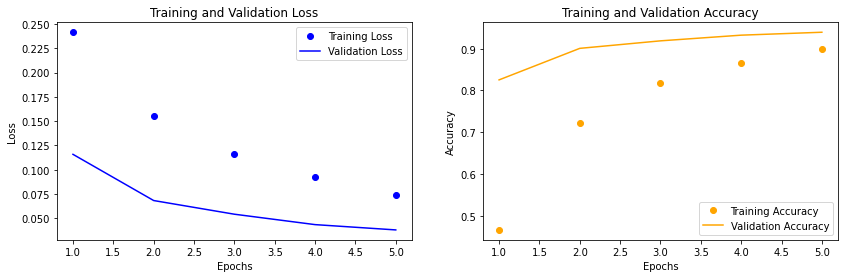

In [21]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo', label='Training Accuracy', c='orange')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy', c='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

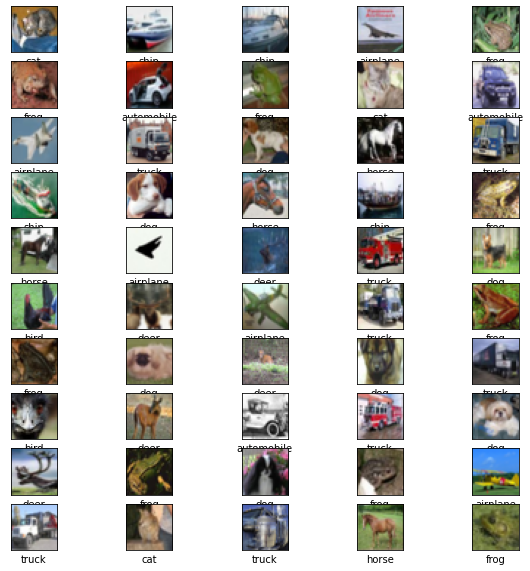

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck'] 

(img_train, label_train), (img_test, label_test) = cifar10.load_data()

num_images = 50 #Change this to display more images in multiples of 5 

plt.figure(figsize=(10,10))
for i in range(num_images):
    plt.subplot(num_images/5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_test[i], cmap=plt.cm.binary) #Change this from test to train
    plt.xlabel(class_names[label_test[i][0]]) #Change this from test to train
plt.show()

In [23]:
# Load trained CNN model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('model.h5')
  
indices = np.argmax(model.predict(x_test[:num_images]),1) #Change this from test to train but use x_train or x_test
print("Predicted labels for test images displayed above:")
print([class_names[x] for x in indices]) 

lst1 = []
a= 0

for i in range(num_images):
  lst1.append(class_names[label_test[i][0]])  #Change this from test to train
lst2 = [class_names[x] for x in indices]

for i in range(num_images): 
  if lst2[i] == lst1[i]: 
    a+=1
  else: continue
print("CNN Model can predict", a ,"correctly out of", num_images ,"test images.")

Predicted labels for test images displayed above:
['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'truck', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship', 'dog', 'horse', 'ship', 'frog', 'horse', 'airplane', 'deer', 'truck', 'dog', 'bird', 'deer', 'airplane', 'truck', 'frog', 'frog', 'dog', 'deer', 'dog', 'truck', 'bird', 'deer', 'truck', 'truck', 'dog', 'deer', 'frog', 'dog', 'frog', 'airplane', 'truck', 'cat', 'ship', 'horse', 'frog']
CNN Model can predict 47 correctly out of 50 test images.


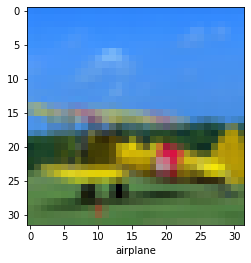

Top 3 classes are: airplane and probability is 0.9986541
Top 3 classes are: horse and probability is 0.0003447501
Top 3 classes are: truck and probability is 0.00023419708


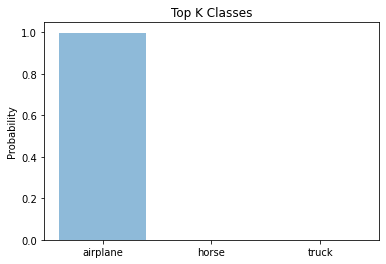

In [25]:
top_k = 3 #Change this value for more k 
n = random.randint(0,num_images) #Change this number to display any of the above nth images
lst = [] 
idx = []
top_values, top_indices = tf.nn.top_k(model.predict(x_test[n-1:n]), k=top_k) 
plt.imshow(img_test[n-1], cmap=plt.cm.binary) #Change this from test to train
plt.xlabel(class_names[label_test[n-1][0]])
plt.show() 

for i in top_indices[0]:
  print("Top",top_k, "classes are:" ,class_names[i], "and probability is",model.predict(x_test[n-1:n])[0][i])
  lst.append(model.predict(x_test[n-1:n])[0][i])
  idx.append(class_names[i])

objects = tuple(idx)
y_pos = np.arange(len(objects))
performance = lst
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('Top K Classes')
plt.show()

Saving ogdoggo3.jpg to ogdoggo3 (4).jpg


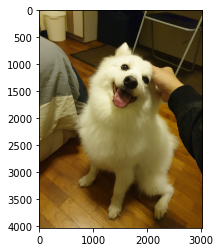

In [104]:
uploaded = files.upload() 
im = Image.open(BytesIO(uploaded['ogdoggo3.jpg'])) #Update JPG name file as you upload the image
array= np.array(im) 
array = array /255  
array = cv2.resize(array, dsize=(32,32), interpolation=cv2.INTER_CUBIC)
#plt.imshow(array) 
plt.imshow(im)

Predicted class for uploaded image is: ['dog']
Top 3 classes are: dog and probability is 0.9242159
Top 3 classes are: bird and probability is 0.015184658
Top 3 classes are: automobile and probability is 0.013395314


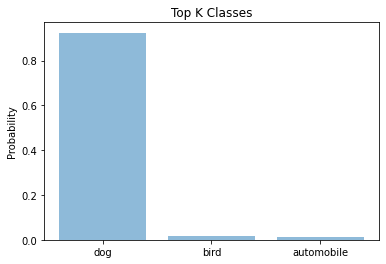

In [105]:
top_k = 3 #Change this value for more k 
array = np.resize(array,(1,32,32,3)) 
lst1=[]
lst2=[]
pred = np.argmax(model.predict(array),1) 
print("Predicted class for uploaded image is:",[class_names[x] for x in pred])
top_values, top_indices = tf.nn.top_k(model.predict(array), k=top_k) 
for i in top_indices[0]:
  print("Top",top_k, "classes are:" ,class_names[i], "and probability is",model.predict(array)[0][i])
  lst1.append(model.predict(array)[0][i])
  lst2.append(class_names[i])
objects = tuple(lst2)
y_pos = np.arange(len(objects))
performance = lst1
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('Top K Classes')
plt.show()
